In [44]:
import numpy as np

import astropy
import astropy.units as ur
import astropy.constants as cr

%matplotlib inline

from pylab import *

In [9]:
flu = ur.erg/ur.s/ur.cm**2/ur.Angstrom
fnu = ur.erg/ur.s/ur.cm**2/ur.Hertz
q = -22*ur.ABmag

In [13]:

q.to(flu, equivalencies=ur.spectral_density(5000*ur.AA))

<Quantity 2.74713938 erg / (Angstrom cm2 s)>

In [54]:
skymag = np.array([22, 20, 19]) * ur.ABmag
skymag

<Magnitude [22., 20., 19.] mag(AB)>

In [116]:
Dtel = 2.4 * ur.meter
Atel = np.pi*(Dtel/2)**2 * .8
pixel_size = 0.5 # arcsec
pixel_area = pixel_size**2 # Arcsec2
efficiency = 0.4

Grasp = Atel * pixel_area * efficiency

In [117]:
exptime = 20*ur.min
lam = 5000 * ur.AA
epp = cr.c*cr.h/lam

spectral_density = skymag.to(flu, equivalencies=ur.spectral_density(lam))

Rs = np.arange(100, 6000)
pix_per_res = 3.
BW_per_pix = lam/Rs/pix_per_res


In [118]:
spectral_density

<Quantity [6.90050213e-18, 4.35392250e-17, 1.09365589e-16] erg / (Angstrom cm2 s)>

In [119]:
sky_energys = (spectral_density  * exptime * Atel)
sky_energys.cgs

<Quantity [0.02996845, 0.18908814, 0.47496794] dyn>

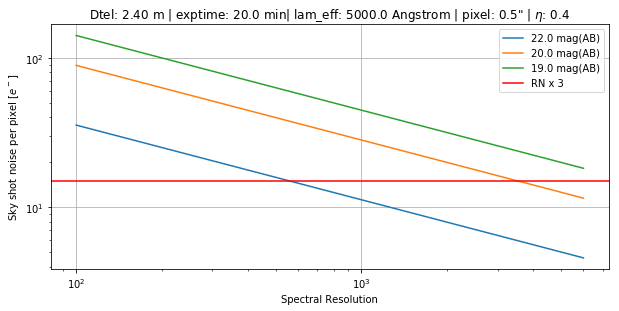

In [125]:
spectral_energy = (spectral_density  * exptime * Atel)

figure(figsize=(10,4.5))
for e_l in spectral_energy:
    num_photons = (e_l*BW_per_pix/epp).cgs
    shotnoise = np.sqrt(num_photons)
    loglog(Rs, shotnoise)

RN = 5
GOAL = 3
axhline(RN * GOAL, color='red')

xlabel("Spectral Resolution")
ylabel("Sky shot noise per pixel [$e^-$]")
title("Dtel: {0:1.2f} | exptime: {1}| lam_eff: {2} | pixel: {3}\" | $\eta$: {4}".format(Dtel, exptime, lam, pixel_size, efficiency))

legs = ["%s" % m for m in skymag]
legs.append("RN x %s" % GOAL)
legend(legs)
grid(True)